In [1]:
import numpy as np
import torch
import os

from pathlib import Path
from tqdne.utils import *
from tqdne.conf import Config

/users/abosisio/miniforge3/envs/tqdne/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/users/abosisio/miniforge3/envs/tqdne/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/users/abosisio/miniforge3/envs/tqdne/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
dataset_folder = "../outputs/"
model_path_str = dataset_folder + "ddim-pred:sample-2D-downsampling:1_LogSpectrogram-hop_size:16stft_channels:128"

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    torch.cuda.empty_cache()
else: 
    device = torch.device('cpu')

torch.cuda.is_available(), device

(True, device(type='cuda'))

2024-04-26 11:25:04 - root - INFO - Last checkpoint is : ../outputs/ddim-pred:sample-2D-downsampling:1_LogSpectrogram-hop_size:16stft_channels:128/name=0_epoch=91-val_loss=0.01.ckpt
/users/abosisio/miniforge3/envs/tqdne/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'net' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['net'])`.


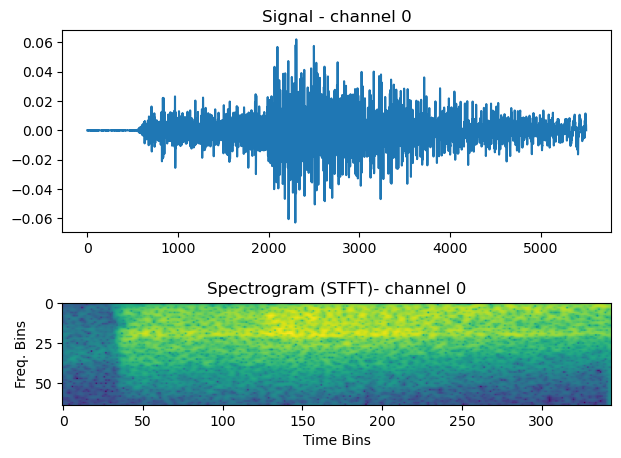

Model: LightningDiffusion
Number of learnable parameters: 38139459
Model size: 458.24 MB
UNet scheme: 
 base num. channels: 32 
 channel multipliers (down/up blocks): (1, 2, 4, 8) 
 num. ResBlocks per down/up block: 2 
 use Attention: True 
 conv. kernel size: 5 
Diffusion prediction type: sample
Learning rate schedule: 
 start: 0.0003 
 scheduler: cosine 
 warmup steps: 500
Batch size: 50
The model was trained on signals with length 5472, as the sampling rate used was 100, whihc is the original sampling rate.
Data representation shape: (1, 3, 64, 344) (batch_size, channels, signal_length)
Data representation name: LogSpectrogram
ckpt file: ../outputs/ddim-pred:sample-2D-downsampling:1_LogSpectrogram-hop_size:16stft_channels:128/name=0_epoch=91-val_loss=0.01.ckpt


In [4]:
model, model_data_repr, ckpt = load_model(Path(model_path_str), use_ddim=False)
model.to(device)
model.eval()
print_model_info(model, model_data_repr, ckpt)

## Norcia

In [5]:
data_path = "/users/abosisio/scratch/tqdne/datasets/Norcia_distance_vs30.csv"

data = np.genfromtxt(data_path, delimiter=',', skip_header=1, usecols=(-1, -2))
data = data[~np.isnan(data).any(axis=1)]
data.shape

(471, 2)

In [6]:
mag = 6.5
is_shallow_crustal = 1.

In [7]:
cond_input = np.array([
    data[:, -2], 
    is_shallow_crustal * np.ones(data.shape[0]),
    mag * np.ones(data.shape[0]),
    data[:, -1]
]).T

cond_input.shape

(471, 4)

In [8]:
gen_data = generate_data(model, model_data_repr, raw_output=False, cond_input=cond_input, num_samples=20*cond_input.shape[0], device=device, max_batch_size=model.hparams.optimizer_params.batch_size)

Batch 1/188


100%|██████████| 100/100 [00:45<00:00,  2.21it/s]


Batch 2/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 3/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 4/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 5/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 6/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 7/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 8/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 9/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 10/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 11/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 12/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 13/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 14/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 15/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 16/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 17/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 18/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 19/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 20/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 21/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 22/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 23/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 24/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 25/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 26/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 27/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 28/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 29/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 30/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 31/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 32/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 33/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 34/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 35/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 36/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 37/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 38/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 39/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 40/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 41/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 42/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 43/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 44/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 45/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 46/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 47/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 48/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 49/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 50/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 51/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 52/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 53/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 54/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 55/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 56/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 57/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 58/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 59/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 60/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 61/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 62/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 63/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 64/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 65/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 66/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 67/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 68/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 69/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 70/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 71/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 72/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 73/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 74/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 75/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 76/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 77/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 78/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 79/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 80/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 81/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 82/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 83/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 84/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 85/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 86/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 87/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 88/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 89/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 90/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 91/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 92/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 93/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 94/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 95/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 96/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 97/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 98/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 99/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 100/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 101/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 102/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 103/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 104/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 105/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 106/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 107/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 108/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 109/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 110/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 111/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 112/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 113/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 114/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 115/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 116/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 117/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 118/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 119/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 120/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 121/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 122/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 123/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 124/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 125/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 126/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 127/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 128/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 129/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 130/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 131/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 132/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 133/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 134/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 135/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 136/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 137/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 138/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 139/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 140/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 141/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 142/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 143/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 144/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 145/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 146/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 147/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 148/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 149/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 150/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 151/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 152/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 153/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 154/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 155/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 156/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 157/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 158/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 159/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 160/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 161/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 162/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 163/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 164/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 165/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 166/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 167/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 168/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 169/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 170/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 171/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 172/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 173/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 174/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 175/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 176/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 177/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 178/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 179/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 180/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 181/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 182/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 183/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 184/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 185/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 186/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 187/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 188/188


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 189/188


100%|██████████| 100/100 [00:21<00:00,  4.72it/s]


In [9]:
import pickle
with open(dataset_folder + 'norcia_gm0-stft.pkl', 'wb') as f:
    pickle.dump(gen_data, f)

## Amatrice

In [5]:
data_path = "/users/abosisio/scratch/tqdne/datasets/Amatrice_distance_vs30.csv"

data = np.genfromtxt(data_path, delimiter=',', skip_header=1, usecols=(-1, -2))
data = data[~np.isnan(data).any(axis=1)]
data.shape

(430, 2)

In [6]:
mag = 6.0
is_shallow_crustal = 1.

In [7]:
cond_input = np.array([
    data[:, -2], 
    is_shallow_crustal * np.ones(data.shape[0]),
    mag * np.ones(data.shape[0]),
    data[:, -1]
]).T

cond_input.shape

(430, 4)

In [ ]:
gen_data = generate_data(model, model_data_repr, raw_output=False, cond_input=cond_input, num_samples=20*cond_input.shape[0], device=device, max_batch_size=model.hparams.optimizer_params.batch_size)

Batch 1/172


100%|██████████| 100/100 [00:33<00:00,  3.02it/s]


Batch 2/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 3/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 4/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 5/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 6/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 7/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 8/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 9/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 10/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 11/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 12/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 13/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 14/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


Batch 15/172


100%|██████████| 100/100 [00:32<00:00,  3.04it/s]


In [ ]:
import pickle
with open(dataset_folder + 'amatrice_gm0-stft', 'wb') as f:
    pickle.dump(gen_data, f)

In [ ]:
print("Done!!")